<a href="https://colab.research.google.com/github/ChaytiSaha/Covid-19-prediction-perspective-BD/blob/main/Copy_of_ARIMA_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#ARIMA and Seasonal ARIMA
#Autoregressive Integrated Moving Averages

#The general process for ARIMA models is the following:

 #   Visualize the Time Series Data
 #   Make the time series data stationary
 #   Plot the Correlation and AutoCorrelation Charts
 #   Construct the ARIMA Model or Seasonal ARIMA based on the data
 #   Use the model to make predictions


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel("Covid-19 dataset for Bangladesh.xlsx")

In [ ]:
df.head()

,Date,Testing sample per day,Detected per day,Total detected,Recovery per day,Death per day,Total Death
0,2020-03-08,4,3,3,0.0,0,0
1,2020-03-09,5,0,3,0.0,0,0
2,2020-03-10,127,0,3,0.0,0,0
3,2020-03-11,10,0,3,0.0,0,0
4,2020-03-12,21,0,3,0.0,0,0


In [ ]:
df.tail()

,Date,Testing sample per day,Detected per day,Total detected,Recovery per day,Death per day,Total Death
294,2020-12-27,12650,1049,509148,1473.0,24,7452
295,2020-12-28,12617,932,510080,1357.0,27,7479
296,2020-12-29,14588,1181,511261,1245.0,30,7509
297,2020-12-30,15229,1235,512496,1507.0,22,7531
298,2020-12-31,13254,1014,513510,1389.0,28,7559


In [ ]:
#from pandas import to_datetime
#df['Date']= pd.to_datetime(df['Date'])
#df['Date']

0     2020-03-08
1     2020-03-09
2     2020-03-10
3     2020-03-11
4     2020-03-12
         ...    
269   2020-12-02
270   2020-12-03
271   2020-12-04
272   2020-12-05
273   2020-12-06
Name: Date, Length: 274, dtype: datetime64[ns]

In [ ]:
df_detected = df[["Date","Detected per day"]]
df_detected.set_index('Date',inplace=True)
df_detected.ffill(inplace=True)
df_detected1 = df_detected
df_detected

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Detected per day
Date,
2020-03-08,3
2020-03-09,0
2020-03-10,0
2020-03-11,0
2020-03-12,0
...,...
2020-12-27,1049
2020-12-28,932
2020-12-29,1181


In [ ]:
df_death = df[["Date","Death per day"]]
df_death.set_index('Date',inplace=True)
df_death.ffill(inplace=True)
df_death1 = df_death
df_death.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Death per day
Date,
2020-03-08,0
2020-03-09,0
2020-03-10,0
2020-03-11,0
2020-03-12,0


In [ ]:
df_recovery = df[["Date","Recovery per day"]]
df_recovery.set_index('Date',inplace=True)
df_recovery.ffill(inplace=True)
df_recovery1 = df_recovery
df_recovery.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Recovery per day
Date,
2020-03-08,0.0
2020-03-09,0.0
2020-03-10,0.0
2020-03-11,0.0
2020-03-12,0.0


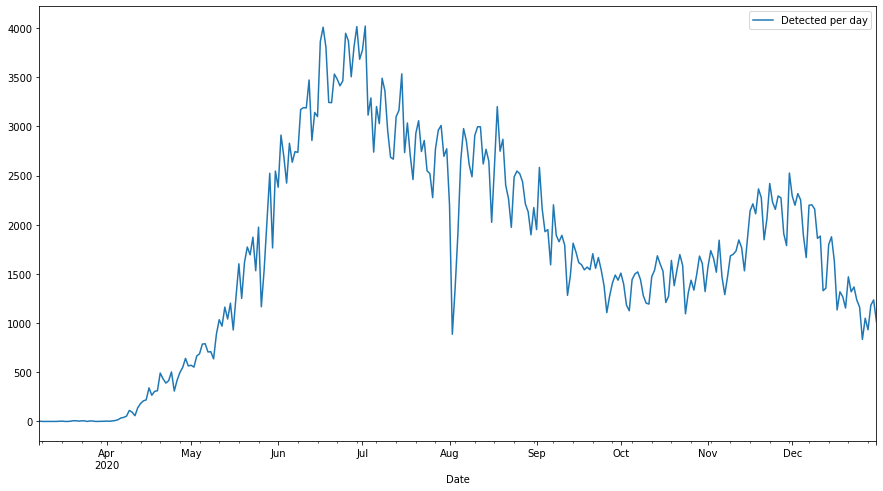

In [ ]:
df_detected1.plot(figsize=(15,8))

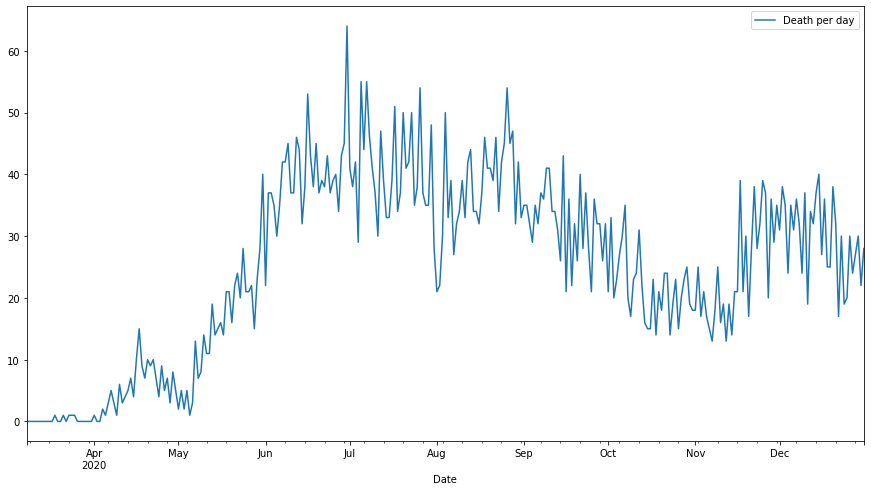

In [ ]:
df_death1.plot(figsize=(15,8))

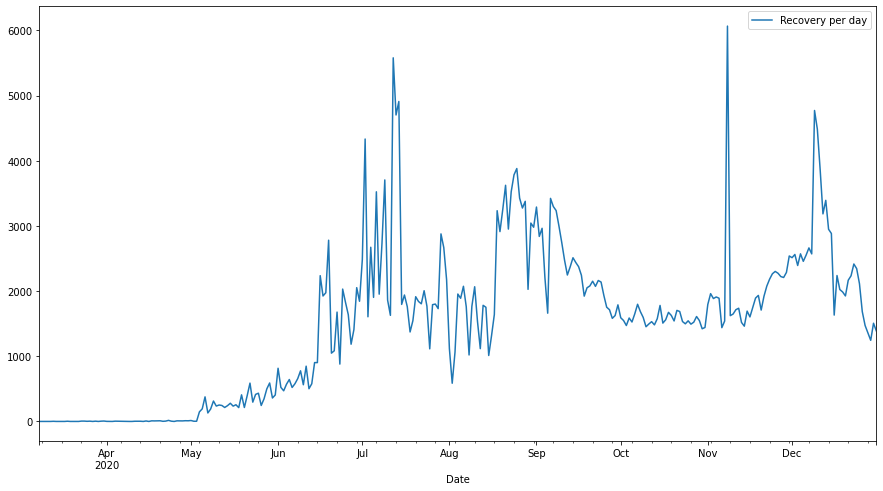

In [ ]:
df_recovery1.plot(figsize=(15,8))

In [ ]:


#As mentioned previously, before we can build a model, we must ensure that the time series is stationary. There are two primary way to determine whether a given time series is stationary.

 #   Rolling Statistics: Plot the rolling mean and rolling standard deviation. 
  #  The time series is stationary if they remain constant with time 
   # (with the naked eye look to see if the lines are straight and parallel to the x-axis).
    
   # Augmented Dickey-Fuller Test: The time series is considered stationary 
    #if the p-value is low (according to the null hypothesis) and 
     #the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics



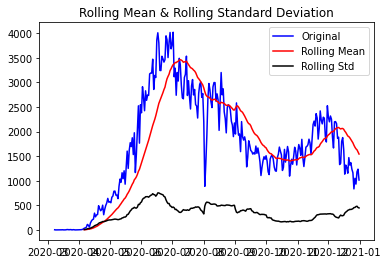

In [ ]:
rolling_mean = df_detected.rolling(window = 30).mean()
rolling_std = df_detected.rolling(window = 30).std()
plt.plot(df_detected, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

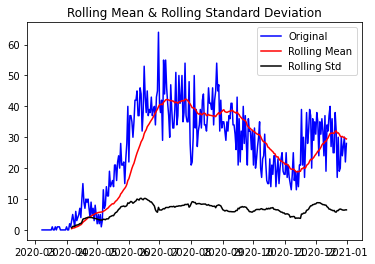

In [ ]:
rolling_mean = df_death.rolling(window = 30).mean()
rolling_std = df_death.rolling(window = 30).std()
plt.plot(df_death, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

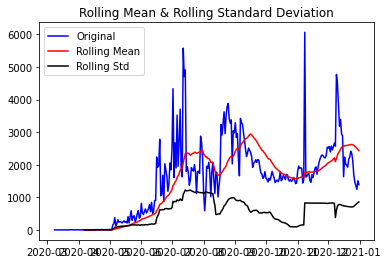

In [ ]:
rolling_mean = df_recovery1.rolling(window = 30).mean()
rolling_std = df_recovery1.rolling(window = 30).std()
plt.plot(df_recovery, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
#As the rolling mean and rolling standard deviation increase with time. 
#Therefore, we can conclude that the time series is not stationary.

In [ ]:
### Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [ ]:
#test_result_detected=adfuller(df_detected['Detected per day'])
#test_result_death=adfuller(df_death['Death per day'])
#test_result_recovery=adfuller(df_recovery['Recovery per day'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df_detected['Detected per day'])

ADF Test Statistic : -2.297858995339325
p-value : 0.17265941796374096
#Lags Used : 16
Number of Observations Used : 282
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df_death['Death per day'])

ADF Test Statistic : -1.9494303581925798
p-value : 0.30917641615394276
#Lags Used : 13
Number of Observations Used : 285
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df_recovery1['Recovery per day'])

ADF Test Statistic : -1.9341781456038354
p-value : 0.31615733124816464
#Lags Used : 9
Number of Observations Used : 289
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#trying to making stationary using log transforming

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


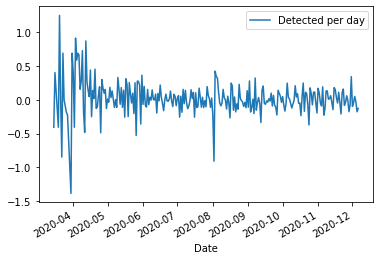

In [ ]:
#df_detected['Detected per day'] = np.log(df_detected['Detected per day'])
#droping inf value 
#df_detected = df_detected[np.isfinite(df_detected).all(1)]

#df_detected = df_detected.diff().dropna()
#df_detected.plot()

In [ ]:
#adfuller_test(df_detected['Detected per day'])

ADF Test Statistic : -2.552535119912424
p-value : 0.1032093683439439
#Lags Used : 13
Number of Observations Used : 248
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#trying to make stationary using Differencing

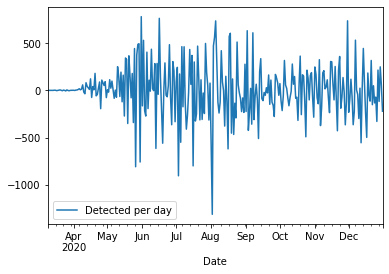

In [ ]:
df_detected = df_detected.diff().dropna()
df_detected.plot()

In [ ]:
adfuller_test(df_detected['Detected per day'])

ADF Test Statistic : -2.5310405746784785
p-value : 0.10810330712025312
#Lags Used : 15
Number of Observations Used : 282
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


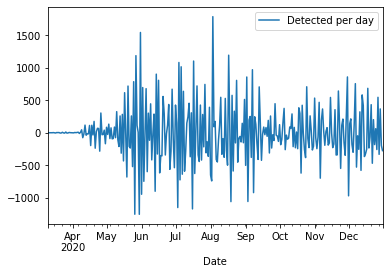

In [ ]:
df_detected = df_detected.diff().dropna()
df_detected.plot()

In [ ]:
adfuller_test(df_detected['Detected per day'])

ADF Test Statistic : -9.83225173559936
p-value : 5.00126037331724e-17
#Lags Used : 14
Number of Observations Used : 282
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


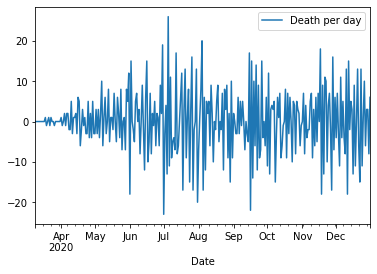

In [ ]:
df_death = df_death.diff().dropna()
df_death.plot()

In [ ]:
adfuller_test(df_death['Death per day'])

ADF Test Statistic : -5.871169444170047
p-value : 3.23766787990256e-07
#Lags Used : 12
Number of Observations Used : 285
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


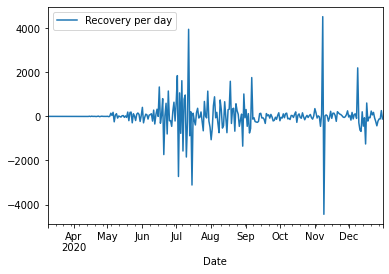

In [ ]:
df_recovery1 = df_recovery1.diff().dropna()
df_recovery1.plot()

In [ ]:
adfuller_test(df_recovery1['Recovery per day'])

ADF Test Statistic : -7.92757230067004
p-value : 3.584425593730177e-12
#Lags Used : 8
Number of Observations Used : 289
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#AR model, ACF, PACF, Auto ARIMA, ARIMA, SARIMA, Error measurement on "Detected per day"

In [ ]:
#Auto Regressive Model 

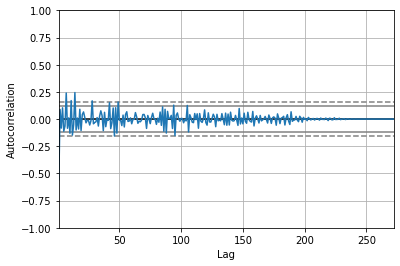

In [ ]:
#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(df_detected['Detected per day'])
#plt.show()

In [ ]:
#Final Thoughts on Autocorrelation and Partial Autocorrelation

  #Identification of an AR model is often best done with the PACF.
  #For an AR model, the theoretical PACF “shuts off” past the order of the model. 
  #The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way,
  #the number of non-zero partial autocorrelations gives the order of the AR model. 
  #By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

  #Identification of an MA model is often best done with the ACF rather than the PACF.
  #For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. 
  #A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved 
  #in the model.

In [ ]:
#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df_detected['Detected per day'],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(df_detected['Detected per day'],lags=40,ax=ax2)

In [ ]:
#Pyramid Auto-ARIMA
#The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an 
#ARIMA model and returns a fitted ARIMA model.

In [ ]:
# To install the library 
!pip install pmdarima 


In [ ]:
# Import the library 
from pmdarima import auto_arima 

In [ ]:
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit_detected = auto_arima(df_detected['Detected per day'], start_p = 1, start_q = 1, 
                          m = 30, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit_detected.summary() 

#Best model:  ARIMA(5,0,1)(2,1,0)[30] intercept
#Total fit time: 866.552 seconds

#SARIMAX Results Dep. Variable: 	y 	No. Observations: 	272
#Model: 	SARIMAX(5, 0, 1)x(2, 1, 1, 30) 	Log Likelihood 	-1739.238
#Date: 	Sat, 16 Jan 2021 	AIC 	3500.476
#Time: 	19:22:39 	BIC 	3538.854
#Sample: 	0 	HQIC 	3515.936

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=12.66 sec
 ARIMA(0,0,0)(0,1,0)[30] intercept   : AIC=4223.817, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[30] intercept   : AIC=4072.622, Time=4.94 sec
 ARIMA(0,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=8.11 sec
 ARIMA(0,0,0)(0,1,0)[30]             : AIC=4221.817, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[30] intercept   : AIC=4148.625, Time=0.36 sec
 ARIMA(1,0,0)(2,1,0)[30] intercept   : AIC=4031.666, Time=12.90 sec
 ARIMA(1,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=30.06 sec
 ARIMA(1,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=11.37 sec
 ARIMA(0,0,0)(2,1,0)[30] intercept   : AIC=4128.891, Time=10.21 sec
 ARIMA(2,0,0)(2,1,0)[30] intercept   : AIC=4004.711, Time=22.82 sec
 ARIMA(2,0,0)(1,1,0)[30] intercept   : AIC=4051.135, Time=6.46 sec
 ARIMA(2,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=31.95 sec
 ARIMA(2,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=12.94 sec
 ARIMA(3,0,0)(2,1,0)[30] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  297
Model:             SARIMAX(5, 0, 1)x(2, 1, [], 30)   Log Likelihood               -1920.427
Date:                             Fri, 05 Mar 2021   AIC                           3860.854
Time:                                     15:56:53   BIC                           3896.727
Sample:                                          0   HQIC                          3875.264
                                             - 297                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0421      1.589     -0.656      0.512      -4.157       2.073
ar.L1         -0.3759      0.056     -6.771      0.000      -0.485      -0.267
ar.L2         -0.3142      0.056     -5.627      0.000      -0.424      -0.205
ar.L3         -0.3455      0.056     -6.192      0.000      -0.455      -0.236
ar.L4         -0.2595      0.068     -3.817      0.000      -0.393      -0.126
ar.L5         -0.2948      0.059     -5.004      0.000      -0.410      -0.179
ma.L1         -0.9278      0.026    -35.316      0.000      -0.979      -0.876
ar.S.L30      -0.6556      0.050    -13.122      0.000      -0.754      -0.558
ar.S.L60      -0.3425      0.064     -5.385      0.000      -0.467      -0.218
sigma2      9.659e+04   7048.042     13.704      0.000    8.28e+04     1.1e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                23.96
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.30
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_detected=ARIMA(df_detected1['Detected per day'],order=(5,0,1))
model_fit_detected=model_detected.fit()

In [ ]:
model_fit_detected.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Detected per day   No. Observations:                  299
Model:                     ARMA(5, 1)   Log Likelihood               -2089.029
Method:                       css-mle   S.D. of innovations            260.440
Date:                Fri, 05 Mar 2021   AIC                           4194.058
Time:                        16:01:03   BIC                           4223.661
Sample:                    03-08-2020   HQIC                          4205.906
                         - 12-31-2020                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1070.4099    829.818      1.290      0.197    -556.003    2696.823
ar.L1.Detected per day     1.1732      0.121      9.696      0.000       0.936       1.410
ar.L2.Detected per day    -0.2646      0.117     -2.254      0.024      -0.495      -0.034
ar.L3.Detected per day    -0.0838      0.090     -0.929      0.353      -0.261       0.093
ar.L4.Detected per day     0.0852      0.090      0.951      0.341      -0.090       0.261
ar.L5.Detected per day     0.0835      0.066      1.261      0.207      -0.046       0.213
ma.L1.Detected per day    -0.4964      0.109     -4.569      0.000      -0.709      -0.283
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0057           -0.0000j            1.0057           -0.0000
AR.2            0.8874           -1.1432j            1.4472           -0.1449
AR.3            0.8874           +1.1432j            1.4472            0.1449
AR.4           -1.8998           -1.4400j            2.3839           -0.3968
AR.5           -1.8998           +1.4400j            2.3839            0.3968
MA.1            2.0147           +0.0000j            2.0147            0.0000
-----------------------------------------------------------------------------
"""

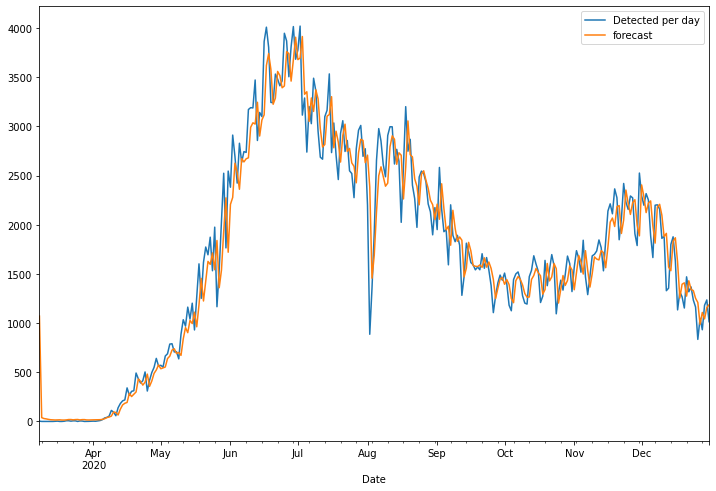

In [ ]:
df_detected1['forecast'] = model_fit_detected.predict(start=0,end=300)
df_detected1[['Detected per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
print(rmse(df_detected1["Detected per day"],df_detected1["forecast"]))
  
# Calculate mean squared error 
print(mean_squared_error(df_detected1["Detected per day"], df_detected1["forecast"]))

267.24886826632047
71421.9575896291


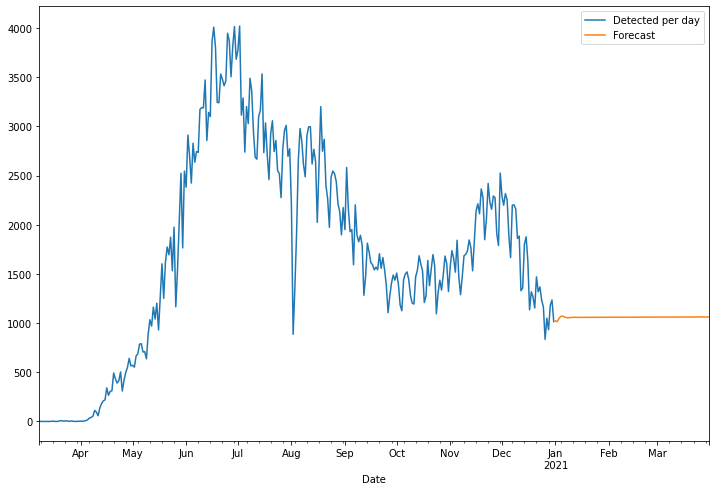

In [ ]:
# Forecast for the next 5 months using ARIMA
from pandas.tseries.offsets import DateOffset
forecast = model_fit_detected.predict(start = len(df_detected1),  
                          end = (len(df_detected1)-1) + 90).rename('Forecast') 
  
# Plot the forecast values 
df_detected1['Detected per day'].plot(figsize = (12, 8), legend = True) 
forecast.plot(legend = True) 

In [ ]:
forecast.head(30)

2021-01-01    1023.081485
2021-01-02    1013.879205
2021-01-03    1044.596657
2021-01-04    1068.000073
2021-01-05    1070.406653
2021-01-06    1064.438223
2021-01-07    1056.685697
2021-01-08    1053.527983
2021-01-09    1054.535408
2021-01-10    1056.895236
2021-01-11    1058.502794
2021-01-12    1058.763193
2021-01-13    1058.267523
2021-01-14    1057.767559
2021-01-15    1057.624435
2021-01-16    1057.786849
2021-01-17    1058.036695
2021-01-18    1058.214825
2021-01-19    1058.290114
2021-01-20    1058.312242
2021-01-21    1058.338198
2021-01-22    1058.392529
2021-01-23    1058.468838
2021-01-24    1058.549984
2021-01-25    1058.624492
2021-01-26    1058.690831
2021-01-27    1058.753178
2021-01-28    1058.815808
2021-01-29    1058.880351
2021-01-30    1058.946146
Freq: D, Name: Forecast, dtype: float64

In [ ]:
import statsmodels.api as sm
model_detected_sm=sm.tsa.statespace.SARIMAX(df_detected1['Detected per day'],order=(5, 0, 1),seasonal_order=(2,1,0,30))
results_detected_sm=model_detected_sm.fit(disp=0)

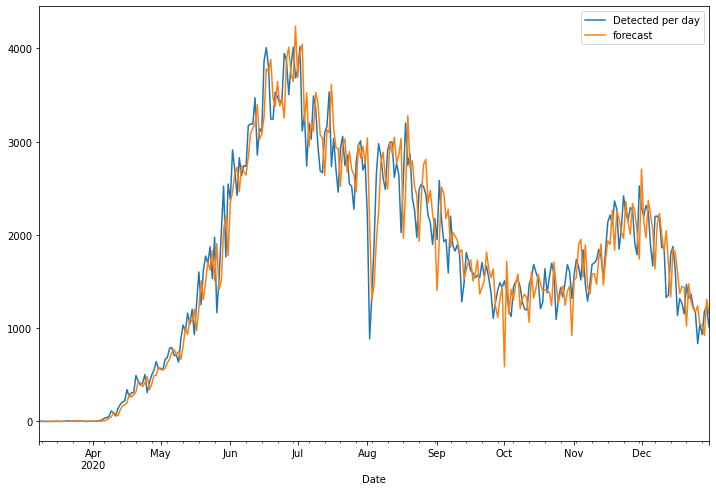

In [ ]:
df_detected1['forecast'] = results_detected_sm.predict(start=0, end=300)
df_detected1[['Detected per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
print(rmse(df_detected1["Detected per day"],df_detected1["forecast"]))
  
# Calculate mean squared error 
print(mean_squared_error(df_detected1["Detected per day"], df_detected1["forecast"]))


307.5994111924533
94617.39776594397


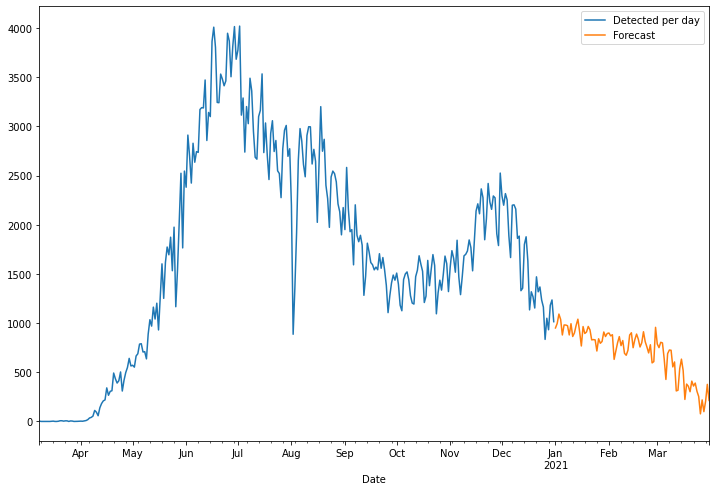

In [ ]:
# Forecast for the next 5 months using SARIMAX
from pandas.tseries.offsets import DateOffset
forecast1 = results_detected_sm.predict(start = len(df_detected1),  
                          end = (len(df_detected1)-1) + 90).rename('Forecast') 
  
# Plot the forecast values 
df_detected1['Detected per day'].plot(figsize = (12, 8), legend = True) 
forecast1.plot(legend = True) 

In [ ]:
forecast1.head(30)

2021-01-01     950.175745
2021-01-02     995.758578
2021-01-03    1091.403506
2021-01-04    1037.177621
2021-01-05     878.977682
2021-01-06     980.535600
2021-01-07     979.848114
2021-01-08     972.953086
2021-01-09     879.298544
2021-01-10     993.561702
2021-01-11     863.451729
2021-01-12     899.700787
2021-01-13     978.305994
2021-01-14    1039.435863
2021-01-15     911.878985
2021-01-16     767.081152
2021-01-17     964.508183
2021-01-18     894.168873
2021-01-19     909.321290
2021-01-20     965.634368
2021-01-21     931.260609
2021-01-22     829.240293
2021-01-23     831.978221
2021-01-24     829.106869
2021-01-25     715.947383
2021-01-26     840.359842
2021-01-27     794.495264
2021-01-28     812.568807
2021-01-29     909.155148
2021-01-30     863.161894
Freq: D, Name: Forecast, dtype: float64

In [ ]:
#AR model, ACF, PACF, Auto ARIMA, ARIMA, SARIMA, Error measurement on "Death per day"

In [ ]:
#Auto Regressive Model 

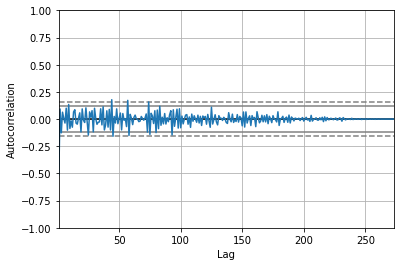

In [ ]:
#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(df_death['Death per day'])
#plt.show()

In [ ]:
#Final Thoughts on Autocorrelation and Partial Autocorrelation

  #Identification of an AR model is often best done with the PACF.
  #For an AR model, the theoretical PACF “shuts off” past the order of the model. 
  #The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way,
  #the number of non-zero partial autocorrelations gives the order of the AR model. 
  #By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

  #Identification of an MA model is often best done with the ACF rather than the PACF.
  #For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. 
  #A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved 
  #in the model.

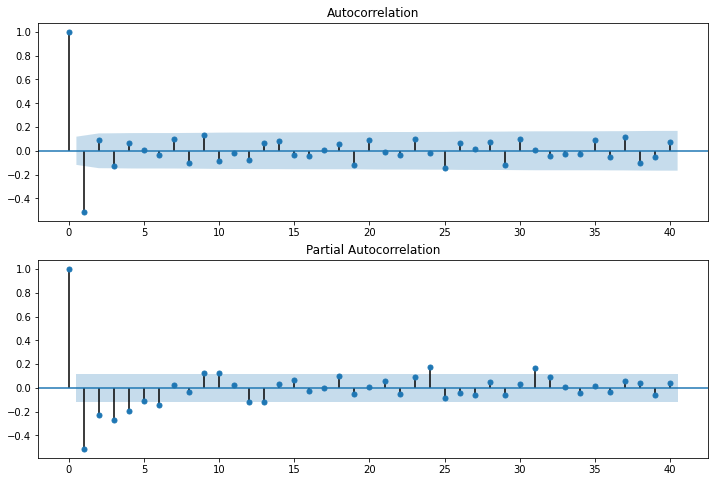

In [ ]:
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df_death['Death per day'],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(df_death['Death per day'],lags=40,ax=ax2)

In [ ]:
#Pyramid Auto-ARIMA
#The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an 
#ARIMA model and returns a fitted ARIMA model.

In [ ]:
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit_death = auto_arima(df_death['Death per day'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 30, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit_death.summary() 

#Best model:  ARIMA(3,0,3)(2,1,0)[30]          
#Total fit time: 597.743 seconds

#SARIMAX Results Dep. Variable: 	y 	No. Observations: 	273
#Model: 	SARIMAX(3, 0, 3)x(2, 1, [], 30) 	Log Likelihood 	-824.029
#Date: 	Sun, 17 Jan 2021 	AIC 	1666.057
#Time: 	08:47:19 	BIC 	1697.495
#Sample: 	0 	HQIC 	1678.720

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=10.20 sec
 ARIMA(0,0,0)(0,1,0)[30] intercept   : AIC=2048.545, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[30] intercept   : AIC=1916.338, Time=3.23 sec
 ARIMA(0,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=8.20 sec
 ARIMA(0,0,0)(0,1,0)[30]             : AIC=2046.547, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[30] intercept   : AIC=1971.909, Time=0.42 sec
 ARIMA(1,0,0)(2,1,0)[30] intercept   : AIC=1896.575, Time=9.16 sec
 ARIMA(1,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=28.84 sec
 ARIMA(1,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=12.08 sec
 ARIMA(0,0,0)(2,1,0)[30] intercept   : AIC=1982.697, Time=6.82 sec
 ARIMA(2,0,0)(2,1,0)[30] intercept   : AIC=1880.616, Time=11.59 sec
 ARIMA(2,0,0)(1,1,0)[30] intercept   : AIC=1908.728, Time=3.71 sec
 ARIMA(2,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=37.51 sec
 ARIMA(2,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=14.59 sec
 ARIMA(3,0,0)(2,1,0)[30] intercept   : AIC=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  298
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 30)   Log Likelihood                -921.864
Date:                             Fri, 05 Mar 2021   AIC                           1851.728
Time:                                     16:14:43   BIC                           1866.092
Sample:                                          0   HQIC                          1857.497
                                             - 298                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7429      0.039    -18.843      0.000      -0.820      -0.666
ar.S.L30      -0.5599      0.052    -10.723      0.000      -0.662      -0.458
ar.S.L60      -0.3431      0.064     -5.346      0.000      -0.469      -0.217
sigma2        54.0171      4.067     13.280      0.000      46.045      61.989
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):                 7.00
Prob(Q):                              0.29   Prob(JB):                         0.03
Heteroskedasticity (H):               1.94   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_death=ARIMA(df_death1['Death per day'],order=(3,0,3))
model_fit_death=model_death.fit()
model_fit_death.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Death per day   No. Observations:                  299
Model:                     ARMA(3, 3)   Log Likelihood                -980.259
Method:                       css-mle   S.D. of innovations       12693413.187
Date:                Fri, 05 Mar 2021   AIC                           1976.518
Time:                        16:16:22   BIC                           2006.121
Sample:                    03-08-2020   HQIC                          1988.366
                         - 12-31-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0844        nan        nan        nan         nan         nan
ar.L1.Death per day    -0.8307   2.53e-05  -3.28e+04      0.000      -0.831      -0.831
ar.L2.Death per day     0.7860   2.37e-05   3.31e+04      0.000       0.786       0.786
ar.L3.Death per day     0.9841        nan        nan        nan         nan         nan
ma.L1.Death per day     1.0849      0.030     36.727      0.000       1.027       1.143
ma.L2.Death per day    -0.3114      0.052     -5.942      0.000      -0.414      -0.209
ma.L3.Death per day    -0.7247      0.030    -24.472      0.000      -0.783      -0.667
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0162           -0.0000j            1.0162           -0.0000
AR.2           -0.9074           -0.4202j            1.0000           -0.4310
AR.3           -0.9074           +0.4202j            1.0000            0.4310
MA.1            1.3799           -0.0000j            1.3799           -0.0000
MA.2           -0.9048           -0.4258j            1.0000           -0.4300
MA.3           -0.9048           +0.4258j            1.0000            0.4300
-----------------------------------------------------------------------------
"""

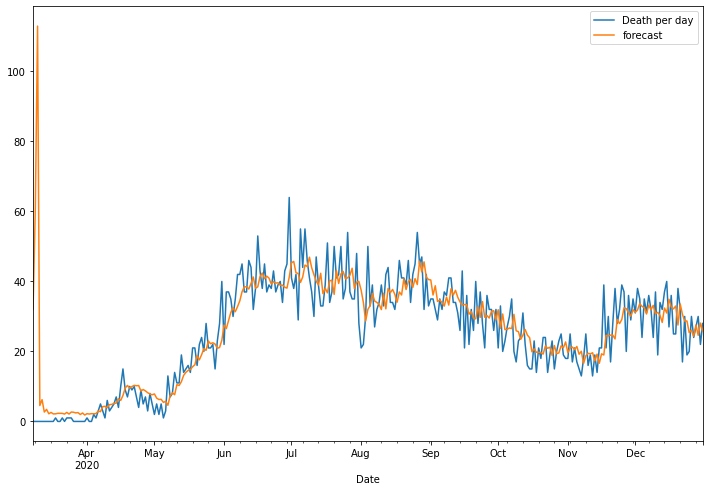

In [ ]:
df_death1['forecast'] = model_fit_death.predict(start=0,end=300)
df_death1[['Death per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Calculate root mean squared error 
print(rmse(df_death1["Death per day"],df_death1["forecast"]))

# Calculate mean squared error 
print(mean_squared_error(df_death1["Death per day"], df_death1["forecast"]))

9.788539584613524
95.81550719954589


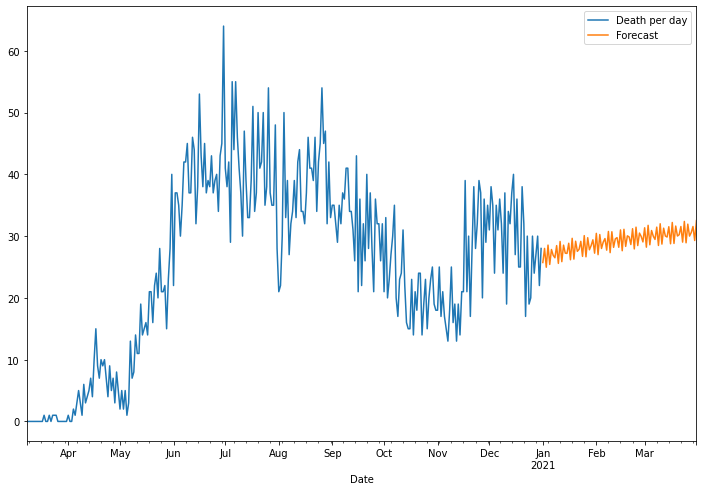

In [ ]:
forecast = model_fit_death.predict(start = len(df_death1),  
                          end = (len(df_death1)-1) + 90).rename('Forecast') 
  
# Plot the forecast values 
df_death1['Death per day'].plot(figsize = (12, 8), legend = True) 
forecast.plot(legend = True) 

In [ ]:
forecast.head(30)

2021-01-01    25.727050
2021-01-02    28.010406
2021-01-03    24.957506
2021-01-04    28.546878
2021-01-05    25.412604
2021-01-06    27.833150
2021-01-07    26.891152
2021-01-08    26.491752
2021-01-09    28.465213
2021-01-10    25.584851
2021-01-11    29.135704
2021-01-12    25.864073
2021-01-13    28.538248
2021-01-14    27.239686
2021-01-15    27.200669
2021-01-16    28.844093
2021-01-17    26.170261
2021-01-18    29.644795
2021-01-19    26.274105
2021-01-20    29.173832
2021-01-21    27.534933
2021-01-22    27.858441
2021-01-23    29.155173
2021-01-24    26.719361
2021-01-25    30.080433
2021-01-26    26.649898
2021-01-27    29.744397
2021-01-28    27.785000
2021-01-29    28.468950
2021-01-30    29.406023
Freq: D, Name: Forecast, dtype: float64

In [ ]:
model_death_sm=sm.tsa.statespace.SARIMAX(df_death1['Death per day'],order=(3, 0, 3),seasonal_order=(2,1,0,30))
results_death_sm=model_death_sm.fit(disp=0)

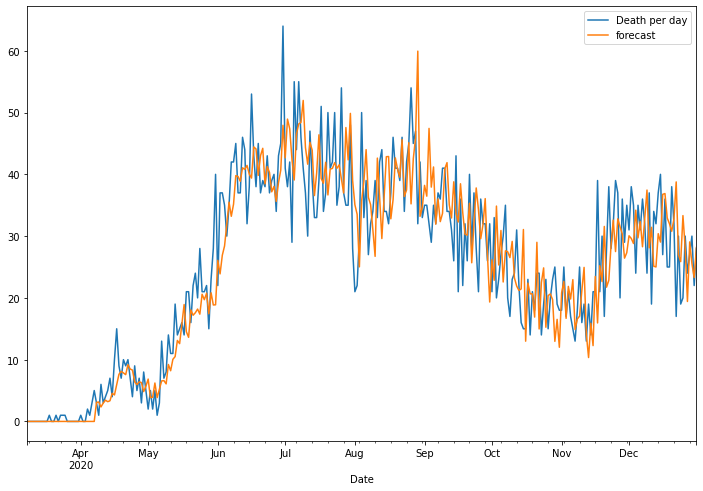

In [ ]:
df_death1['forecast'] = results_death_sm.predict(start=0, end=300)
df_death1[['Death per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Calculate root mean squared error 
print(rmse(df_death1["Death per day"],df_death1["forecast"]))
  
# Calculate mean squared error 
print(mean_squared_error(df_death1["Death per day"], df_death1["forecast"]))

6.968758640406051
48.563596988233996


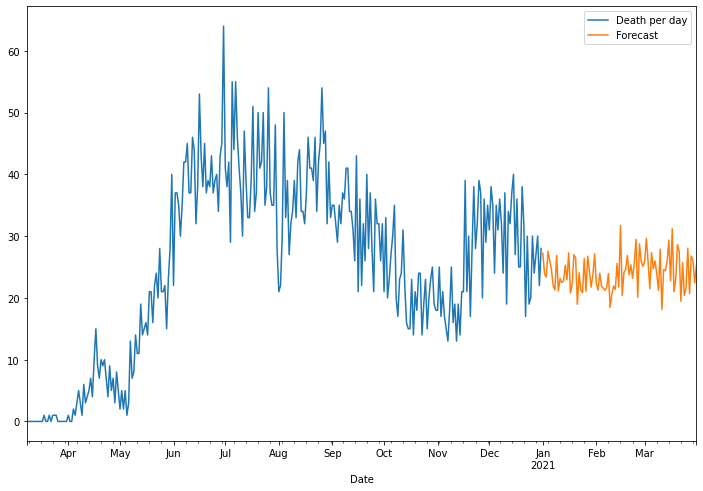

In [ ]:
# Forecast for the next 5 months using SARIMAX
forecast1 = results_death_sm.predict(start = len(df_death1),  
                          end = (len(df_death1)-1) + 90).rename('Forecast') 
  
# Plot the forecast values 
df_death1['Death per day'].plot(figsize = (12, 8), legend = True) 
forecast1.plot(legend = True) 

In [ ]:
forecast1.head(30)

2021-01-01    27.236190
2021-01-02    23.870987
2021-01-03    23.390149
2021-01-04    27.540950
2021-01-05    26.094227
2021-01-06    24.557569
2021-01-07    21.977526
2021-01-08    21.279472
2021-01-09    26.885466
2021-01-10    21.123224
2021-01-11    23.119338
2021-01-12    22.474253
2021-01-13    22.742960
2021-01-14    25.309587
2021-01-15    22.971190
2021-01-16    27.284446
2021-01-17    20.762148
2021-01-18    22.239623
2021-01-19    26.975448
2021-01-20    26.524301
2021-01-21    18.959529
2021-01-22    24.065057
2021-01-23    21.295556
2021-01-24    20.848076
2021-01-25    26.361625
2021-01-26    21.086691
2021-01-27    26.753505
2021-01-28    24.383419
2021-01-29    21.735527
2021-01-30    23.776869
Freq: D, Name: Forecast, dtype: float64

In [ ]:
#AR model, ACF, PACF, Auto ARIMA, ARIMA, SARIMA, Error measurement on "Recovery per day"

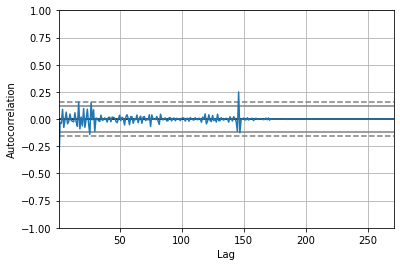

In [ ]:
#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(df_recovery['Recovery per day'])
#plt.show()

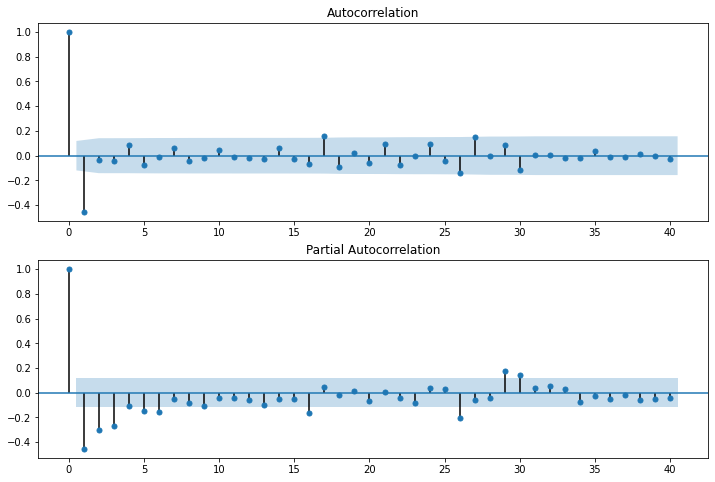

In [ ]:
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df_recovery['Recovery per day'],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(df_recovery['Recovery per day'],lags=40,ax=ax2)

In [ ]:
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit_recovery = auto_arima(df_recovery['Recovery per day'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 30, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit_recovery.summary() 

#Best model:  ARIMA(2,0,1)(2,1,0)[30]          
#Total fit time: 600.991 seconds

#SARIMAX Results Dep. Variable: 	y 	No. Observations: 	271
#Model: 	SARIMAX(1, 0, 1)x(2, 1, [], 30) 	Log Likelihood 	-2075.449
#Date: 	Sun, 17 Jan 2021 	AIC 	4160.897
#Time: 	09:03:59 	BIC 	4178.321
#Sample: 	0 	HQIC 	4167.917

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=15.90 sec
 ARIMA(0,0,0)(0,1,0)[30] intercept   : AIC=4588.673, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[30] intercept   : AIC=4355.826, Time=5.88 sec
 ARIMA(0,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=12.33 sec
 ARIMA(0,0,0)(0,1,0)[30]             : AIC=4599.771, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[30] intercept   : AIC=4450.205, Time=0.26 sec
 ARIMA(1,0,0)(2,1,0)[30] intercept   : AIC=4325.721, Time=14.58 sec
 ARIMA(1,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=34.46 sec
 ARIMA(1,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=12.01 sec
 ARIMA(0,0,0)(2,1,0)[30] intercept   : AIC=4520.120, Time=10.82 sec
 ARIMA(2,0,0)(2,1,0)[30] intercept   : AIC=4306.209, Time=28.60 sec
 ARIMA(2,0,0)(1,1,0)[30] intercept   : AIC=4343.560, Time=7.67 sec
 ARIMA(2,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=37.33 sec
 ARIMA(2,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=17.46 sec
 ARIMA(3,0,0)(2,1,0)[30] intercept   : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  299
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 30)   Log Likelihood               -2141.667
Date:                             Fri, 05 Mar 2021   AIC                           4295.334
Time:                                     16:36:30   BIC                           4316.903
Sample:                                          0   HQIC                          4303.996
                                             - 299                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2360      0.105     11.800      0.000       1.031       1.441
ar.L2         -0.2533      0.095     -2.667      0.008      -0.439      -0.067
ma.L1         -0.7552      0.090     -8.434      0.000      -0.931      -0.580
ar.S.L30      -0.8137      0.047    -17.143      0.000      -0.907      -0.721
ar.S.L60      -0.3839      0.057     -6.784      0.000      -0.495      -0.273
sigma2      4.571e+05   1.88e+04     24.334      0.000     4.2e+05    4.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1219.76
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.52   Skew:                             1.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
from pandas.tseries.offsets import DateOffset
import statsmodels.api as sm

In [ ]:
model_recovery=ARIMA(df_recovery['Recovery per day'],order=(2,0,1))
model_fit_recovery=model_recovery.fit()
model_fit_recovery.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Recovery per day   No. Observations:                  299
Model:                     ARMA(2, 1)   Log Likelihood               -2327.036
Method:                       css-mle   S.D. of innovations            578.756
Date:                Fri, 05 Mar 2021   AIC                           4664.073
Time:                        16:43:24   BIC                           4682.575
Sample:                    03-08-2020   HQIC                          4671.478
                         - 12-31-2020                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1293.3770    559.347      2.312      0.021     197.078    2389.676
ar.L1.Recovery per day     1.2185      0.098     12.473      0.000       1.027       1.410
ar.L2.Recovery per day    -0.2320      0.093     -2.493      0.013      -0.414      -0.050
ma.L1.Recovery per day    -0.7412      0.071    -10.395      0.000      -0.881      -0.601
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0181           +0.0000j            1.0181            0.0000
AR.2            4.2334           +0.0000j            4.2334            0.0000
MA.1            1.3491           +0.0000j            1.3491            0.0000
-----------------------------------------------------------------------------
"""

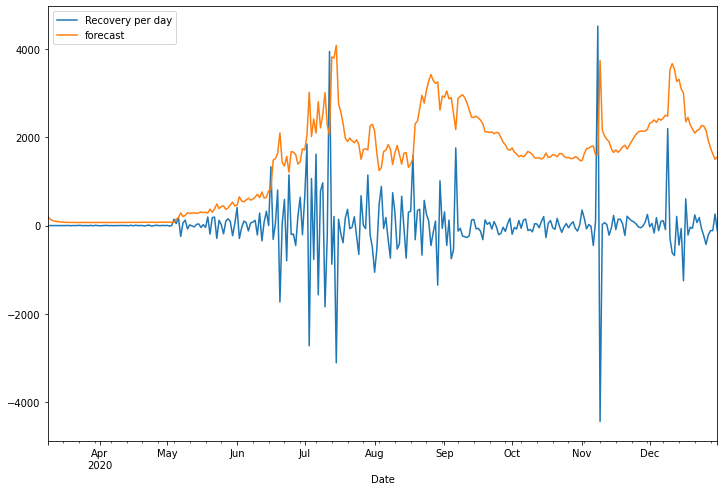

In [ ]:
df_recovery1['forecast'] = model_fit_recovery.predict(start=0,end=300)
df_recovery1[['Recovery per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Calculate root mean squared error 
print(rmse(df_recovery1["Recovery per day"],df_recovery1["forecast"]))

# Calculate mean squared error 
print(mean_squared_error(df_recovery1["Recovery per day"], df_recovery1["forecast"]))

1964.9732592321923
3861119.909497584


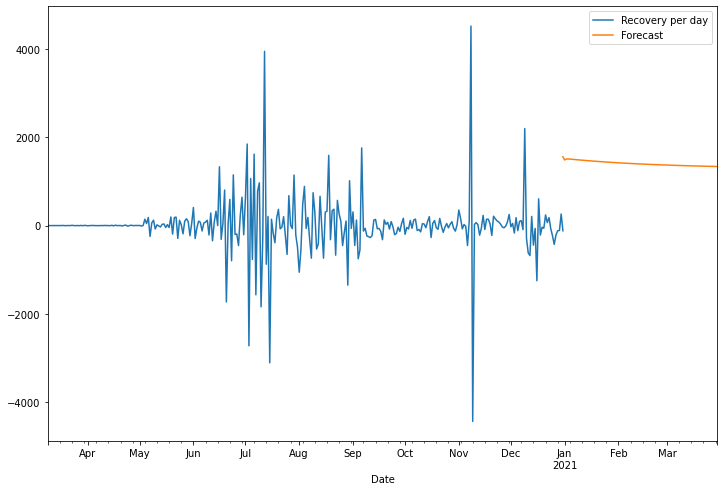

In [ ]:
# Forecast for the next 5 months using ARIMA
from pandas.tseries.offsets import DateOffset
forecast = model_fit_recovery.predict(start = len(df_recovery1),  
                          end = (len(df_recovery1)-1) + 90).rename('Forecast') 
  
# Plot the forecast values 
df_recovery1['Recovery per day'].plot(figsize = (12, 8), legend = True) 
forecast.plot(legend = True)

In [ ]:
forecast.head(30)

2020-12-31    1562.170319
2021-01-01    1488.686743
2021-01-02    1509.171079
2021-01-03    1511.000833
2021-01-04    1508.477432
2021-01-05    1504.978164
2021-01-06    1501.299871
2021-01-07    1497.629864
2021-01-08    1494.011495
2021-01-09    1490.454122
2021-01-10    1486.959090
2021-01-11    1483.525867
2021-01-12    1480.153492
2021-01-13    1476.840919
2021-01-14    1473.587092
2021-01-15    1470.390974
2021-01-16    1467.251540
2021-01-17    1464.167786
2021-01-18    1461.138724
2021-01-19    1458.163383
2021-01-20    1455.240812
2021-01-21    1452.370074
2021-01-22    1449.550250
2021-01-23    1446.780437
2021-01-24    1444.059749
2021-01-25    1441.387313
2021-01-26    1438.762274
2021-01-27    1436.183791
2021-01-28    1433.651039
2021-01-29    1431.163207
Freq: D, Name: Forecast, dtype: float64

In [ ]:
model_recovery_sm=sm.tsa.statespace.SARIMAX(df_recovery1['Recovery per day'],order=(2, 0, 1),seasonal_order=(2,1,0,30))
results_recovery_sm=model_recovery_sm.fit(disp=0)

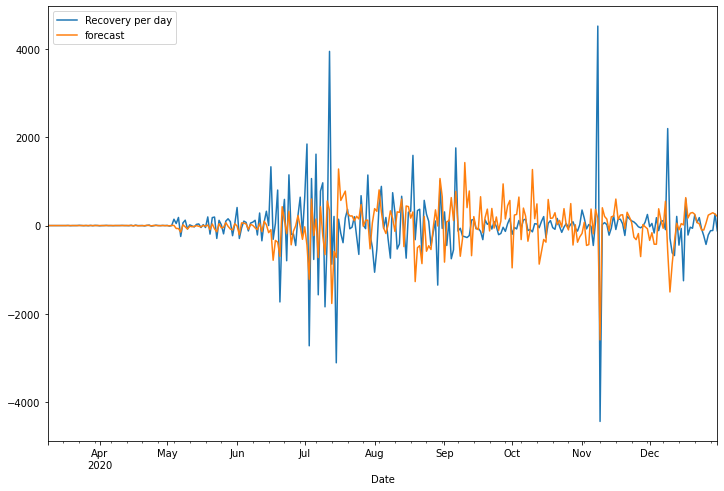

In [ ]:
df_recovery1['forecast'] = results_recovery_sm.predict(start=0, end=300)
df_recovery1[['Recovery per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Calculate root mean squared error 
print(rmse(df_recovery1["Recovery per day"],df_recovery1["forecast"]))
  
# Calculate mean squared error 
print(mean_squared_error(df_recovery1["Recovery per day"], df_recovery1["forecast"]))

641.0135400625409
410898.35854351067


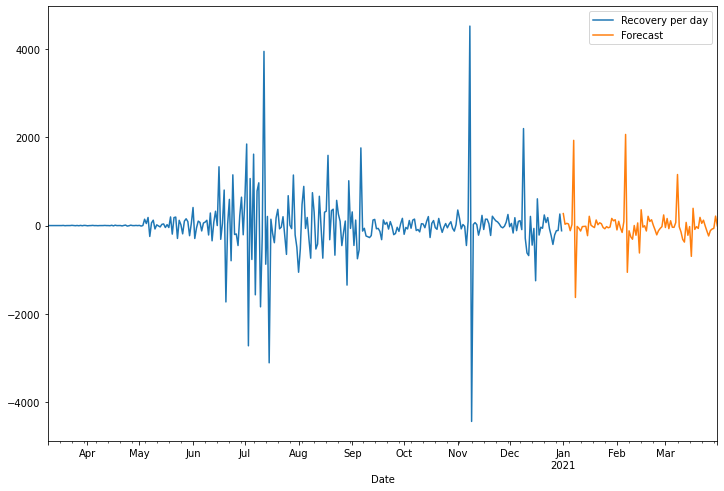

In [ ]:
# Forecast for the next 5 months using SARIMAX
from pandas.tseries.offsets import DateOffset
forecast1 = results_recovery_sm.predict(start = len(df_recovery1),  
                          end = (len(df_recovery1)-1) + 90).rename('Forecast') 
  
# Plot the forecast values 
df_recovery1['Recovery per day'].plot(figsize = (12, 8), legend = True) 
forecast1.plot(legend = True) 

In [ ]:
forecast1.head(30)

2021-01-01     271.323856
2021-01-02      29.835114
2021-01-03      50.861531
2021-01-04      36.376197
2021-01-05    -116.355660
2021-01-06      22.578851
2021-01-07    1933.419487
2021-01-08   -1631.324746
2021-01-09     -20.166084
2021-01-10     -60.551251
2021-01-11    -124.110280
2021-01-12     -23.403142
2021-01-13     -19.279518
2021-01-14     -16.491003
2021-01-15    -229.493856
2021-01-16     210.511370
2021-01-17       8.385969
2021-01-18     -21.745107
2021-01-19     -44.992603
2021-01-20     126.687460
2021-01-21      18.666103
2021-01-22      63.521925
2021-01-23      42.521875
2021-01-24     -43.347528
2021-01-25     -72.444593
2021-01-26     -23.732352
2021-01-27     -50.063062
2021-01-28     -34.306594
2021-01-29     162.309552
2021-01-30     107.792054
Freq: D, Name: Forecast, dtype: float64